In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from time import time
from IPython.display import display
import visuals as vs

data=pd.read_csv("Indian_Liver.csv")
display(data.head(10))
data.shape

,Age,Gender,TB,DB,Alkphos,SGPT,SGOT,TP,ALB,A/G Ratio,Selector_Field
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


(583, 11)

In [2]:
data['Selector_Field'].value_counts()

1    416
2    167
Name: Selector_Field, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000035F2B64A20>,
      dtype=object)

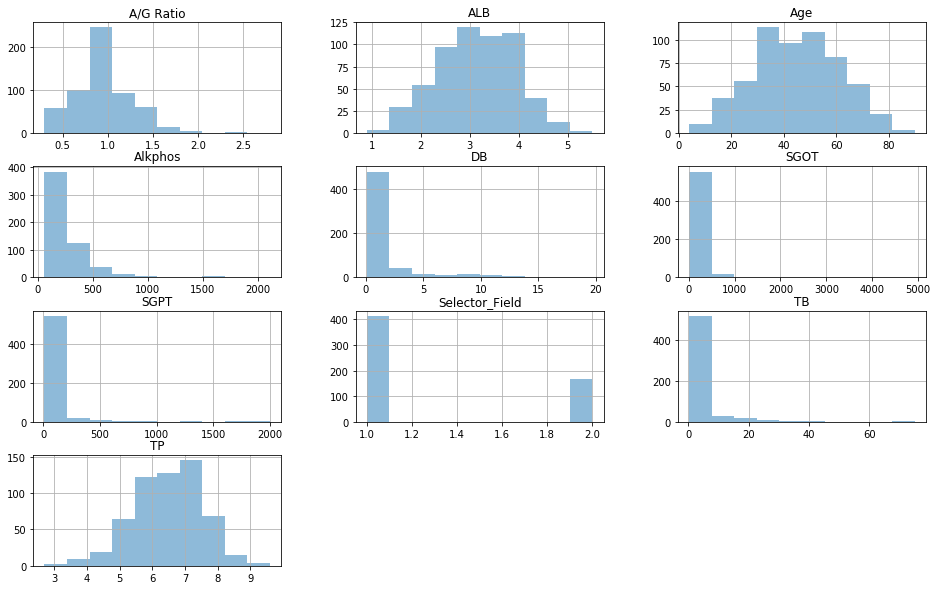

In [30]:
data.hist(alpha=0.5, figsize=(16, 10))

Text(0.5,1,'Have lung disease vs Have no lung disease')

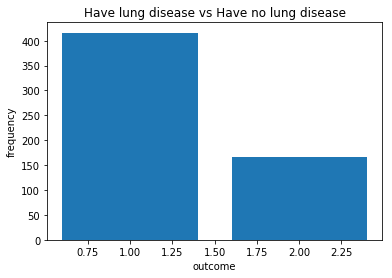

In [4]:
names = list(data['Selector_Field'].unique())
values = [data['Selector_Field'].value_counts()[1],data['Selector_Field'].value_counts()[2]]
plt.bar(names,values)
plt.xlabel('outcome')
plt.ylabel('frequency')
plt.title('Have lung disease vs Have no lung disease')

In [5]:
data.describe()

,Age,TB,DB,Alkphos,SGPT,SGOT,TP,ALB,A/G Ratio,Selector_Field
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
#features= data.drop(['Selector_Field'],axis=1)
#target=data['Selector_Field']
data = data[pd.notnull(data['Age'])]
data = data[pd.notnull(data['DB'])]
data = data[pd.notnull(data['Alkphos'])]
data = data[pd.notnull(data['SGPT'])]                      
data = data[pd.notnull(data['SGOT'])]                       
data = data[pd.notnull(data['TP'])]                       
data = data[pd.notnull(data['ALB'])]                       
data = data[pd.notnull(data['A/G Ratio'])]
data = data[pd.notnull(data['Selector_Field'])]   
print(data.shape)
data.head()

(579, 11)


,Age,Gender,TB,DB,Alkphos,SGPT,SGOT,TP,ALB,A/G Ratio,Selector_Field
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


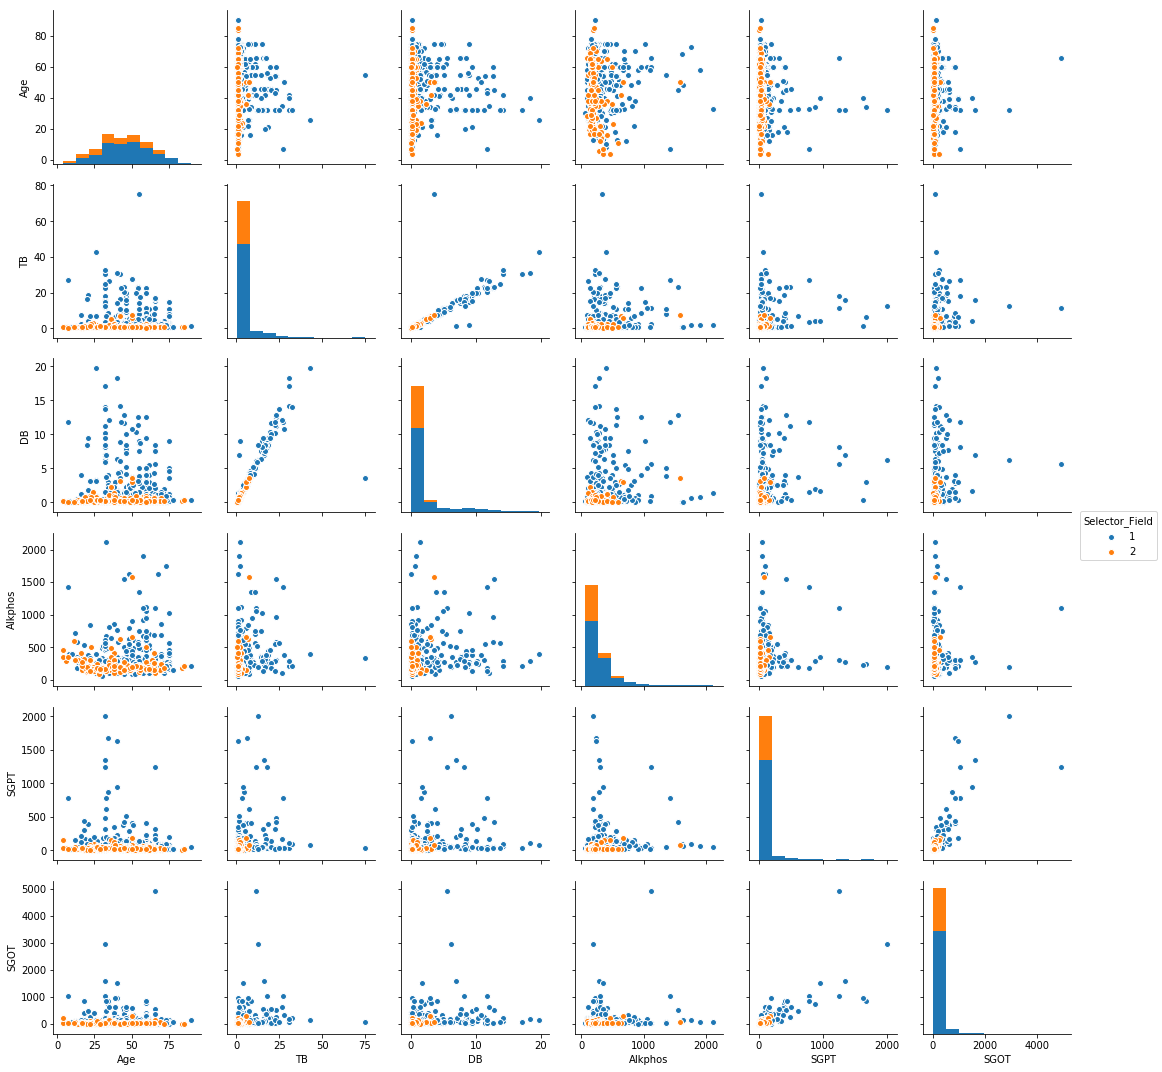

In [7]:
sb.pairplot(data, 'Selector_Field', vars=['Age', 'TB', 'DB', 'Alkphos', 'SGPT','SGOT'])

In [8]:
data.dtypes

Age                 int64
Gender             object
TB                float64
DB                float64
Alkphos             int64
SGPT                int64
SGOT                int64
TP                float64
ALB               float64
A/G Ratio         float64
Selector_Field      int64
dtype: object

In [9]:
df=pd.DataFrame(data.skew(axis = 0, skipna = True),columns=['skewness']).T
df

,Age,TB,DB,Alkphos,SGPT,SGOT,TP,ALB,A/G Ratio,Selector_Field
skewness,-0.033591,4.890768,3.199163,3.753502,6.527575,10.512251,-0.292433,-0.048516,0.992299,0.955179


C:\Users\acer pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


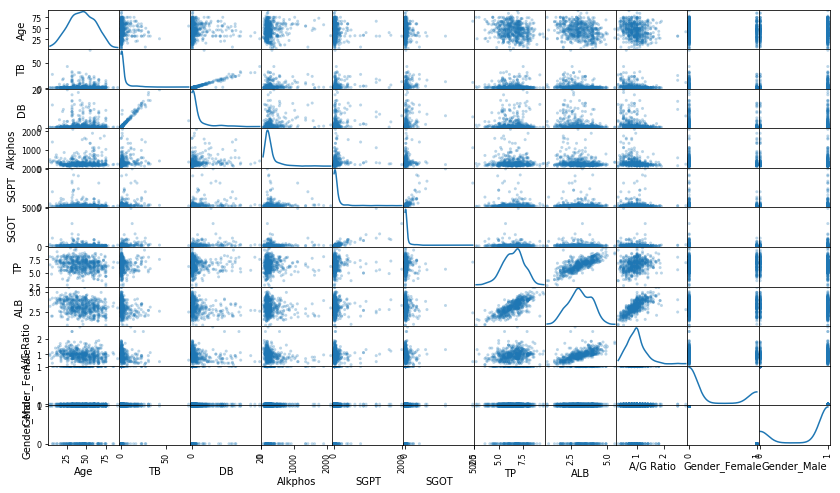

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
disease_initial = data['Selector_Field']
features_initial = data.drop('Selector_Field', axis = 1)
features = pd.get_dummies(features_initial)

pd.scatter_matrix(features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [11]:
data.corr()

,Age,TB,DB,Alkphos,SGPT,SGOT,TP,ALB,A/G Ratio,Selector_Field
Age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
TB,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
DB,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
Alkphos,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
SGPT,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
SGOT,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
TP,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
ALB,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
A/G Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Selector_Field,-0.133164,-0.220218,-0.246273,-0.183363,-0.163117,-0.151834,0.033614,0.159770,0.163131,1.000000


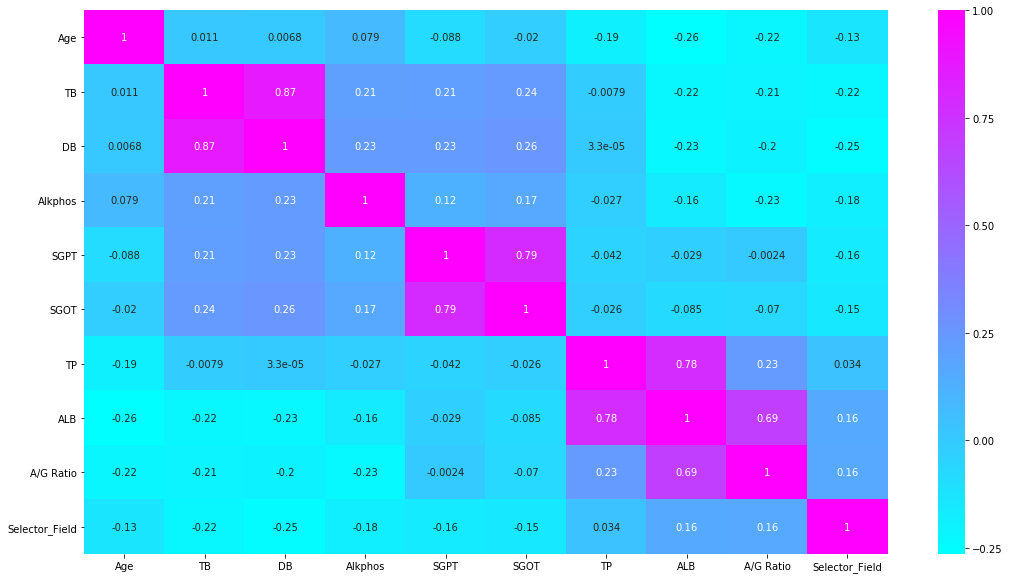

In [12]:
plt.figure(figsize=(18,10))
sb.heatmap(data.corr(), annot = True, cmap='cool')
plt.show()

In [13]:
#gender={'Male':1,'Female':2}
#data.Gender= [gender[item] for item in data.Gender]

skewed = ['ALB', 'DB', 'TB', 'A/G Ratio', 'TP']
features_initial[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

In [14]:
normalized = ['Age','TB','DB','Alkphos','SGPT','SGOT','TP','ALB','A/G Ratio']
skewed = ['ALB', 'DB', 'TB', 'A/G ratio', 'TP']
features_initial[normalized] = scaler.fit_transform(data[normalized])
display(features_initial.describe())

,Age,TB,DB,Alkphos,SGPT,SGOT,TP,ALB,A/G Ratio
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.474214,0.039080,0.071129,0.111561,0.035742,0.020414,0.548071,0.486634,0.258826
std,0.188625,0.083481,0.143699,0.118985,0.092052,0.058925,0.157194,0.172703,0.127837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337209,0.005362,0.005102,0.054958,0.006533,0.003049,0.449275,0.369565,0.160000
50%,0.476744,0.008043,0.010204,0.070835,0.012563,0.006505,0.565217,0.478261,0.252000
75%,0.627907,0.029491,0.061224,0.114802,0.025628,0.015654,0.652174,0.630435,0.320000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
features = pd.get_dummies(features_initial)
data1=pd.get_dummies(data)
#print(data1)
encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print(encoded)
display(features.head())

disease=pd.get_dummies(disease_initial)
encoded = list(disease.columns)
print("{} disease columns after one-hot encoding.".format(len(encoded)))
#print disease[1]
display(disease.head(n=1))



11 total features after one-hot encoding.
['Age', 'TB', 'DB', 'Alkphos', 'SGPT', 'SGOT', 'TP', 'ALB', 'A/G Ratio', 'Gender_Female', 'Gender_Male']


,Age,TB,DB,Alkphos,SGPT,SGOT,TP,ALB,A/G Ratio,Gender_Female,Gender_Male
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1,0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0,1
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0,1
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0,1
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0,1


2 disease columns after one-hot encoding.


,1,2
0,1,0


In [16]:
from sklearn.cross_validation import train_test_split, ShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(features,disease_initial,test_size=0.2, random_state = 41)
print(X_train.shape[0])
print(X_test.shape[0])

463
116


C:\Users\acer pc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score

clf = SVC(random_state =40)
learner =clf.fit(X_train,y_train)
predictSVC = learner.predict(X_test)

print('Using SVC we get an fbeta score of: ',
      round(fbeta_score(y_test,predictSVC,0.5),5)*100,'%')

Using SVC we get an fbeta score of:  79.71000000000001 %


In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


clf_A = AdaBoostClassifier(random_state = 41)
clf_B = LogisticRegression(random_state = 41)
clf_C = DecisionTreeClassifier(random_state = 41)
clf_D = GaussianNB()
learner =clf_A.fit(X_train,y_train)
predict = learner.predict(X_test)
learner =clf_B.fit(X_train,y_train)
predict1 = learner.predict(X_test)
learner =clf_C.fit(X_train,y_train)
predict2 = learner.predict(X_test)
learner =clf_D.fit(X_train,y_train)
predict3 = learner.predict(X_test)

In [19]:
from sklearn.metrics import fbeta_score

print('Using SVC we get an fbeta score of: ',
      round(fbeta_score(y_test,predictSVC,0.5),5)*100,'%')

print('Using Adaboast we get an fbeta score of: ',
      round(fbeta_score(y_test,predict,0.5),5)*100,'%')

print('Using Logistic Regression we get an fbeta score of: ',
      round(fbeta_score(y_test,predict1,0.5),5)*100,'%')

print('Using Decision tree classifier we get an fbeta score of: ',
      round(fbeta_score(y_test,predict2,0.5),5)*100,'%')

print('Using Gaussian Naive Bayes we get an fbeta score of: ',
      round(fbeta_score(y_test,predict3,0.5),5)*100,'%')



Using SVC we get an fbeta score of:  79.71000000000001 %
Using Adaboast we get an fbeta score of:  79.955 %
Using Logistic Regression we get an fbeta score of:  79.963 %
Using Decision tree classifier we get an fbeta score of:  79.89699999999999 %
Using Gaussian Naive Bayes we get an fbeta score of:  78.125 %


In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)
predicted=rfc.predict(X_test)
f_score=fbeta_score(y_test,predicted,beta=0.5,average="macro")
print(f_score)

0.47739055299539174


In [21]:
from sklearn.grid_search import GridSearchCV


clf =DecisionTreeClassifier(random_state =1)

parameters ={'criterion':['gini'],'max_features':[1,2,3,4,5,6,7],'max_depth':[3,8,10,11,12,13,14,15],'min_samples_leaf':[1,2,3,4,5,6],'min_samples_split':[2,4,6,8]}

grid_obj =GridSearchCV(clf,parameters,cv=5)
grid_obj.fit(X_train, y_train)

best_clf = grid_obj.best_estimator_
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
print(grid_obj.best_params_)
print("Unoptimized model\n------")
print("Fbeta score on testing data: {:.4f}".format( round(fbeta_score(y_test,predict2,0.5),5)*100),'%')
final_score=round(fbeta_score(y_test,best_predictions,0.5),5)*100
print("\nOptimized Model\n------")
print("Final fbeta score on the testing data: {:.4f}".format( round(fbeta_score(y_test,best_predictions,0.5),5)*100),'%')

C:\Users\acer pc\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


{'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Unoptimized model
------
Fbeta score on testing data: 79.8970 %

Optimized Model
------
Final fbeta score on the testing data: 79.8080 %


In [22]:
print("Benchmark Model\n------")
print(' fbeta score on testing data : ',round(fbeta_score(y_test,predictSVC,0.5),5)*100,'%')

print("\nFinal Model\n------")
print("Final fbeta score on the testing data: {:.4f}".format( round(fbeta_score(y_test,best_predictions,0.5),5)*100),'%')

Benchmark Model
------
 fbeta score on testing data :  79.71000000000001 %

Final Model
------
Final fbeta score on the testing data: 79.8080 %


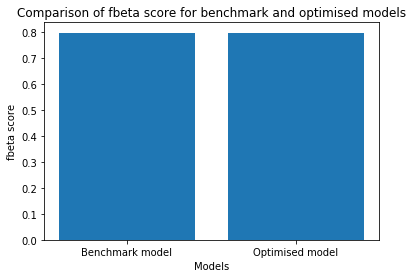

In [23]:
x=['Benchmark model','Optimised model']
value=[0.797,0.798]
plt.bar(x,value)
plt.xlabel('Models')
plt.ylabel('fbeta score')
plt.title('Comparison of fbeta score for benchmark and optimised models')
plt.show()

In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'